In [506]:
# Anna Luisa Boschiroli
# Victor Caetano Tocantins

'''BIBLIOTECAS IMPORTADAS'''

import numpy as np
import matplotlib.pyplot as plt
import math
from math import sin
from math import cos
from math import exp
from math import sqrt 
import random

In [507]:
'''FUNÇÕES DO PROGRAMA'''

def f(x,deltax,t,N,p):
    '''Função que calcula os valores da fonte f para cada item da primeira tarefa;
    Inputs: float posição x, float momento t, string item a e inteiro N;
    Outputs: float fonte em x e t.'''
    if  (p - deltax/2) <= x <= (p + deltax/2):
        return((10*(1+cos(5*t)))*(1/deltax))
    else:
        return(0) 

In [508]:
def printar_matriz(texto, M):
    print(texto, '\n')
    for linha in M:
        print([round(x,ndigits = 6) + 0 for x in linha])
        
def printar_matrizes(M1, M2):
    for i in range(len(M1)):
        l1 = [round(x, ndigits = 6) for x in M1[i]]
        l2 = [round(x, ndigits = 6) for x in M2[i]]
        print(l1,'\t', l2)

In [509]:
def matriz_copia(M):
    MC = np.zeros((len(M), len(M[0])))

    for i in range(len(M)):
        for j in range(len(M[0])):
            MC[i][j] = M[i][j]

    return MC

In [510]:
def CrankNicholsonA(N):
    '''Função que calcula os vetores A pro método implícito através da forma de Crank Nicholson;
    Inputs: inteiro N;
    Outputs: lista de floats da diagonal principal de A A1, lista de floats da diagonal secundária de A A2.'''
    A1=[]                                          
    A2=[]                                           
    for i in range(N-1):
        A1.append(1+N)
        if i<N-2:
            A2.append(-N/2)
    return(A1,A2)

In [511]:
def fatoracaoLDLt(A1,A2,N):
    '''Função que decompões uma matriz em suas componentes L e D;
    Inputs: lista de floats A1 da diagonal principal de A, lista de floats A2 da diagonal secundária de A e inteiro N;
    Outputs: lista de floats L da matriz L e lista de floats D da matriz D.'''
    D=[A1[0]]
    L=[]
    for i in range(1,N):
        L.append(A2[i-1]/D[i-1])
        D.append(A1[i]-D[i-1]*L[i-1]**2)
    return(L,D)

In [512]:
def resolvesistema(A1,A2,B,N):
    '''Função que resolve um sistema linear do tipo proposto pelo problema;
    Inputs: lista de floats A da diagonal principal de A1, lista de floats A2 da diagonal secundária de A, lista de floats B e inteiro N;
    Outputs: Lista de floats X.'''
    L,D=fatoracaoLDLt(A1,A2,N)
    Y=[B[0]]                            #Y = primeira resolução intermediária do sistema (LY=B)
    for i in range(1,N):
        Y.append(B[i-1]-L[i-1]*Y[i-1])
    Z=[]                                #Z = segunda resolução intermediária do sistema (DZ=Y)
    for i in range(N):
        Z.append(Y[i]/D[i])
    X=[0]*N
    X[N-1]=Z[N-1]
    for i in range(N-2,-1,-1):
        X[i]=Z[i]-L[i]*X[i+1]
    return(X)

In [513]:
def CrankNicholsonB(N,U,t,deltat,deltax,p):
    '''Função calcula o vetor B pro método implícito através da forma de Crank Nicholson;
    Inputs: inteiro N, lista de floats com os valores de u para o tempo k-1 U, float t, float deltat, float deltax, string das funções do item a a serem
    testadas item;
    Outputs: lista de floats B.'''
    B=[]
    for i in range(1,N):
        B.append((U[i-1]+U[i+1])*N/2+U[i]*(1-N)+(f(i*deltax,deltax,t-deltat,N,p)+f(i*deltax,deltax,t,N,p))*deltat/2)
        if i==1:
            B[i-1] += 0  
        elif i==N-1:
            B[i-1] += 0
    return(B)

In [514]:
def monta_matrizCN(nf, pp, deltax, x, deltat, t, N, U, X, Ui):
    '''Função que monta a matriz do lado esquerdo do sistema normal com as soluções do método de Cranck-Nicolson'''
    for o in range(nf):
        p = pp[o]
        for j in range(N):
            A1, A2 = CrankNicholsonA(N)    #A1 = vetor com os valores da diagonal principal de A 
                                           #A2 = vetor com os valores da diagonal secundária de A
            for i in range(N+1):
                X.append(x)
                U[0,i] = 0
                x+=deltax
            for k in range(1, N+1):
                B = CrankNicholsonB(N,U[k-1],t,deltat,deltax,p)
                U[k,0] = 0
                U[k,1:N] = resolvesistema(A1,A2,B,N-1)
                U[k,N] = 0
                t = t + deltat
            x = 0
            t-=deltat
        Ui[o][:] = U[N][1:N]
    print('\n As equações resolvidas pelo método de Cranck-Nicolson são:\n', Ui)

In [515]:
def monta_sistema_normal(Un, ai, Ub, nf, Ui):
    '''Função que monta o sistema normal utilizando a matriz obtida na função monta_matrizCN'''
    for a in range(nf):
        for g in range(nf):
            if g == a:
                Un[a][a] = np.inner(Ui[a][:], Ui[a][:])
            else:
                Un[a][g] = np.inner(Ui[a][:], Ui[g][:])
    for s in range(nf):
        Ub[s] = np.inner(ai, Un[s][:])
        
    printar_matriz('\n A matriz dos coeficientes do sistema normal é:', Un)
    printar_matriz('\n O vetor de resultados do sistema normal é:', Ub)

In [516]:
def resolve_sistema_normal(Am, Bm, n):
    '''Função que resolve o sistema normal''' 
    print('\n As matrizes usadas para o sistema normal são:')
    printar_matrizes(Am, Bm)
    print()
    indices = list(range(n))  
    
    for dp in range(n):                                #dp é o índice da diagonal principal
        scalon_diag_princ = 1.0 / Am[dp][dp]
    
        #escalonando a diagonal principal
    
        for j in range(n): 
            Am[dp][j] *= scalon_diag_princ
        Bm[dp][0] *= scalon_diag_princ
        
        #escalonando as linhas restantes
    
        for i in indices[0:dp] + indices[dp+1:]:       #pulando a linha da diagonal principal
            escalonamenton = Am[i][dp]                 #escalonamento da linha n
            for j in range(n):                      
                Am[i][j] = Am[i][j] - escalonamenton * Am[dp][j]
            Bm[i][0] = Bm[i][0] - escalonamenton * Bm[dp][0]    
    printar_matriz('\n A solução do sistema é:', Bm)

In [517]:
def ler_txt():
    file = open("teste.txt", "r")
    check = np.zeros(2049)
    file.readline()
    for read in range(2049):
        check[read] = float(file.readline())
    file.close()
       
    return check

In [518]:
def erro(ut, calc, deltax):
    E = 0
    
    for er in range(N-1):
        E += (ut[er]-calc[er])**2
    E = math.sqrt(deltax*E)
    return E 

In [519]:
def ruido(func):
    
    for ff in range(N-1):
        rand = 2*(random.random()-0.5)
        coef = 1 + 0.01*rand
        func[ff] = coef*func[ff]
    
    return func

In [520]:
def testeA():
    teste = 'a'
    N = 128
    x = 0
    U = np.zeros((N+1,N+1))
    X = []
    T = 1
    deltax = 1/N
    deltat = T/N
    t = deltat
    g1 = 0
    g2 = 0
    pp = np.array([0.35])                 #ponto fornecido pelo enunciado
    nf = 1                                #número de fontes
    Ui = np.zeros((nf,N-1))               #matriz com resultados do Cranck-Nicholson
    
    #Montando a matriz com os resultados do método de Cranck-Nicolson
    
    monta_matrizCN(nf, pp, deltax, x, deltat, t, N, U, X, Ui)
    
    #Montando as matrizes do sistema normal
    
    Un = np.zeros((nf,nf))                #matriz do lado esquedo do sistema normal 
    ai = np.array([7])
    Ub = np.zeros((nf, 1))
    monta_sistema_normal(Un, ai, Ub, nf, Ui)
    
    #Resolução do Sistema Normal 
    
    Am = matriz_copia(Un)
    n = len(Un)
    Bm = matriz_copia(Ub) 
    resolve_sistema_normal(Am, Bm, n)
    var = np.array((Bm[0])*(Ui[0][:]))
    plt.plot(X[1:N], var)
    plt.title('Teste '+str(teste)+', : funções para T= 1, N=%d'%(N))
    plt.xlabel('Posição')
    plt.ylabel('Temperatura')
    plt.legend(loc=1,fontsize='x-small',ncol=3)
    plt.show()

In [521]:
def testeB():
    teste = 'b'
    N = 128
    x = 0
    U = np.zeros((N+1,N+1))
    X = []
    T = 1
    deltax = 1/N
    deltat = T/N
    t = deltat
    g1 = 0
    g2 = 0
    pp = np.array([0.15, 0.3, 0.7, 0.8])  #ponto fornecido pelo enunciado
    nf = 4                                #número de fontes
    Ui = np.zeros((nf,N-1))               #matriz com resultados do Cranck-Nicholson
    
    #Montando a matriz com os resultados do método de Cranck-Nicolson
    
    monta_matrizCN(nf, pp, deltax, x, deltat, t, N, U, X, Ui)
    
    #Montando as matrizes do sistema normal
    
    Un = np.zeros((nf,nf))                #matriz do lado esquedo do sistema normal 
    ai = np.array([2.3, 3.7, 0.3, 4.2])
    Ub = np.zeros((nf, 1))
    monta_sistema_normal(Un, ai, Ub, nf, Ui)
    
    #Resolução do Sistema Normal 
    
    Am = matriz_copia(Un)
    n = len(Un)
    Bm = matriz_copia(Ub)
    resolve_sistema_normal(Am, Bm, n)
    var = np.zeros((nf,N-1))
    for sd in range(len(Bm)):
        var[sd] = np.array((Bm[sd])*(Ui[sd][:]))
        plt.plot(X[1:N], var[sd])
    plt.title('Teste '+str(teste)+', : funções para T= 1, N=%d'%(N))
    plt.xlabel('Posição')
    plt.ylabel('Temperatura')
    plt.legend(loc=1,fontsize='x-small',ncol=3)
    plt.show()
    plt.close()

In [522]:
def testeC(N):
    teste = 'c'
    lerteste = ler_txt()
    lerteste = lerteste[1:2048]
    fontes = np.array([0.14999999999999999, 0.20000000000000001, 0.29999999999999999, 0.34999999999999998, 0.50000000000000000, 0.59999999999999998, 0.69999999999999996, 0.72999999999999998, 0.84999999999999998, 0.90000000000000002])
    x = 0
    U = np.zeros((N+1,N+1))
    X = []
    T = 1
    deltax = 1/N
    deltat = T/N
    t = deltat
    g1 = 0
    g2 = 0
    pp = fontes                           #ponto fornecido pelo enunciado
    nf = 10                               #número de fontes
    Ui = np.zeros((nf,N-1))               #matriz com resultados do Cranck-Nicholson
    vetor = np.zeros(N-1)
    
    #Montando a matriz com os resultados do método de Cranck-Nicolson
    
    monta_matrizCN(nf, pp, deltax, x, deltat, t, N, U, X, Ui)
    
    #Montando as matrizes do sistema normal
    
    Un = np.zeros((nf,nf))                #matriz do lado esquedo do sistema normal 
    ai = np.array([2.3, 3.7, 0.3, 4.2])
    Ub = np.zeros((nf, 1))
    if N == 512:
        for y in range(N-1):
            vetor[y] = lerteste[y*4]
    elif N == 256:
        for y in range(N-1):
            vetor[y] = lerteste[y*8]
    elif N == 128:
        for y in range(N-1):
            vetor[y] = lerteste[y*16]
    elif N == 1024:
        for y in range(N-1):
            vetor[y] = lerteste[y*2]
    elif N == 2048:
        for y in range(N-1):
            vetor[y] = lerteste[y*1]
    for a in range(nf):
        for g in range(nf):
            if g == a:
                Un[a][a] = np.inner(Ui[a][:], Ui[a][:])
            else:
                Un[a][g] = np.inner(Ui[a][:], Ui[g][:])
    for s in range(nf):
        Ub[s] = np.inner(vetor, Ui[s][:])
    
    #Resolução do Sistema Normal 
    
    Am = matriz_copia(Un)
    n = len(Un)
    Bm = matriz_copia(Ub)
    resolve_sistema_normal(Am, Bm, n)
    var = np.zeros((nf,N-1))
    for sd in range(len(Bm)):
        var[sd] = np.array((Bm[sd])*(Ui[sd][:]))
        plt.plot(X[1:N], var[sd])
    plt.title('Teste '+str(teste)+', : funções para T= 1, N=%d'%(N))
    plt.xlabel('Posição')
    plt.ylabel('Temperatura')
    plt.legend(loc=1,fontsize='x-small',ncol=3)
    plt.show()
    plt.close()
    calc = np.zeros(N+1)
    for cc in range(nf):
        calc += Bm[cc]*vetor[cc]
    print(erro(vetor, calc, deltax))
    print('O valor do erro é:', erro(vetor, calc, deltax))

In [523]:
def testeD(N):
    teste = 'd'
    lerteste = ler_txt()
    lerteste = lerteste[1:2048]
    fontes = np.array([0.14999999999999999, 0.20000000000000001, 0.29999999999999999, 0.34999999999999998, 0.50000000000000000, 0.59999999999999998, 0.69999999999999996, 0.72999999999999998, 0.84999999999999998, 0.90000000000000002])
    x = 0
    U = np.zeros((N+1,N+1))
    X = []
    T = 1
    deltax = 1/N
    deltat = T/N
    t = deltat
    g1 = 0
    g2 = 0
    pp = fontes                           #ponto fornecido pelo enunciado
    nf = 10                               #número de fontes
    Ui = np.zeros((nf,N-1))               #matriz com resultados do Cranck-Nicholson
    vetor = np.zeros(N-1)
    
    #Montando a matriz com os resultados do método de Cranck-Nicolson
    
    monta_matrizCN(nf, pp, deltax, x, deltat, t, N, U, X, Ui)
    
    #Montando as matrizes do sistema normal
    
    Un = np.zeros((nf,nf))                #matriz do lado esquedo do sistema normal 
    ai = np.array([2.3, 3.7, 0.3, 4.2])
    Ub = np.zeros((nf, 1))
    if N == 512:
        for y in range(N-1):
            vetor[y] = lerteste[y*4]
    elif N == 256:
        for y in range(N-1):
            vetor[y] = lerteste[y*8]
    elif N == 128:
        for y in range(N-1):
            vetor[y] = lerteste[y*16]
    elif N == 1024:
        for y in range(N-1):
            vetor[y] = lerteste[y*2]
    elif N == 2048:
        for y in range(N-1):
            vetor[y] = lerteste[y*1]
    vetor = ruido(vetor)
    for a in range(nf):
        for g in range(nf):
            if g == a:
                Un[a][a] = np.inner(Ui[a][:], Ui[a][:])
            else:
                Un[a][g] = np.inner(Ui[a][:], Ui[g][:])
    for s in range(nf):
        Ub[s] = np.inner(vetor, Ui[s][:])
    
    #Resolução do Sistema Normal 
    
    Am = matriz_copia(Un)
    n = len(Un)
    Bm = matriz_copia(Ub)
    resolve_sistema_normal(Am, Bm, n)
    var = np.zeros((nf,N-1))
    for sd in range(len(Bm)):
        var[sd] = np.array((Bm[sd])*(Ui[sd][:]))
        plt.plot(X[1:N], var[sd])
    plt.title('Teste '+str(teste)+', : funções para T= 1, N=%d'%(N))
    plt.xlabel('Posição')
    plt.ylabel('Temperatura')
    plt.legend(loc=1,fontsize='x-small',ncol=3)
    plt.show()
    plt.close()
    calc = np.zeros(N+1)
    for cc in range(nf):
        calc += Bm[cc]*vetor[cc]
    print(erro(vetor, calc, deltax))
    print('O valor do erro é:', erro(vetor, calc, deltax))

Digite o teste a ser executado (a, b, c ou d): d
insira o valor de N:128


No handles with labels found to put in legend.



 As equações resolvidas pelo método de Cranck-Nicolson são:
 [[ 0.11749312  0.23498219  0.35430299 ...  0.08925985  0.0629789
   0.02534683]
 [ 0.09930609  0.19860378  0.2994446  ...  0.1293727   0.08639558
   0.04344206]
 [ 0.07444073  0.14887174  0.22445601 ...  0.1838195   0.11090926
   0.07106134]
 ...
 [ 0.00388918  0.00777611  0.0117215  ... -0.01790042  0.01209216
  -0.03368417]
 [ 0.00097551  0.00195051  0.00294023 ...  0.0170013   0.01166752
   0.00445571]
 [ 0.00052361  0.00104737  0.00157946 ...  0.05659717  0.04393917
   0.01550383]]

 As matrizes usadas para o sistema normal são:
[297.739707, 354.193351, 381.889596, 327.60246, 240.950995, 135.446502, 63.555012, 24.882925, 8.131542, 9.260008] 	 [3272.298541]
[354.193351, 430.454124, 473.137066, 408.432159, 304.171885, 171.330556, 80.400401, 31.274132, 10.376459, 12.099956] 	 [4061.707668]
[381.889596, 473.137066, 537.945668, 470.941286, 357.961607, 202.33294, 94.939695, 36.547335, 12.413932, 14.98982] 	 [4643.641819]
[327.

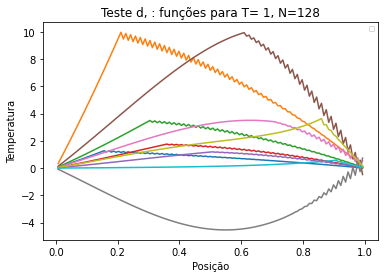

139.59219936556804
O valor do erro é: 139.59219936556804


In [524]:
def main():
    T = 1
    teste = input('Digite o teste a ser executado (a, b, c ou d): ')
    if teste == 'a':
        testeA()
    elif teste == 'b':
        testeB()
    elif teste == 'c':
        N = int(input('insira o valor de N:'))
        testeC(N)
    elif teste == 'd':
        N = int(input('insira o valor de N:'))
        testeD(N)
    
main()